In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from toolkit import get_data

## Getting the Raw Data
NOTE: *I'll be merging the tables from marvels and exoplanet properly during reading week*

For now I'm just working with the dataset from NASA

In [2]:
columns = [
    "planet_mass_j_nasa", 
    "planet_radius_j_nasa", 
    "orbital_period_p_nasa", 
    "calculated_temperature", 
#     "planet_inclination"
]
columns_log_transform = [
    "planet_mass_j_nasa", 
    "planet_radius_j_nasa", 
    "orbital_period_p_nasa"
]
raw_data = get_data()
raw_data.head(10)

planet_status  planet_mass_j  planet_radius_j  \
11 com b                    Confirmed            NaN              NaN   
11 oph b                    Confirmed           21.0              NaN   
11 umi b                    Confirmed            NaN              NaN   
14 and b                    Confirmed            NaN              NaN   
14 her b                    Confirmed            NaN              NaN   
16 cyg b b                  Confirmed            NaN              NaN   
18 del b                    Confirmed            NaN              NaN   
1i/'oumuamua                Confirmed            NaN         0.000002   
1rxs 1609 b                 Confirmed           14.0         1.700000   
1rxs j160929.1-210524 b           NaN            NaN              NaN   

                         orbital_period  planet_eccentricity  \
11 com b                         326.03                0.231   
11 oph b                      730000.00                  NaN   
11 umi b                         516.22                0.080   
14 and b                         185.84                0.000   
14 her b                        1773.40                0.369   
16 cyg b b                       799.50                0.689   
18 del b                         993.30                0.080   
1i/'oumuamua                        NaN                1.196   
1rxs 1609 b                         NaN                  NaN   
1rxs j160929.1-210524 b             NaN                  NaN   

                         planet_inclination  angular_distance  \
11 com b                                NaN          0.011664   
11 oph b                                NaN          1.675862   
11 umi b                                NaN          0.012887   
14 and b                                NaN          0.010864   
14 her b                                NaN          0.153039   
16 cyg b b                              NaN          0.078468   
18 del b                                NaN          0.035568   
1i/'oumuamua                            NaN               NaN   
1rxs 1609 b                             NaN          2.275862   
1rxs j160929.1-210524 b                 NaN               NaN   

                         calculated_temperature  measured_temperature  \
11 com b                                    NaN                   NaN   
11 oph b                                    NaN                   NaN   
11 umi b                                    NaN                   NaN   
14 and b                                    NaN                   NaN   
14 her b                                    NaN                   NaN   
16 cyg b b                                  NaN                   NaN   
18 del b                                    NaN                   NaN   
1i/'oumuamua                                NaN                   NaN   
1rxs 1609 b                                 NaN                1800.0   
1rxs j160929.1-210524 b                     NaN                   NaN   

                        discovery_method  ... controversial_confirmation_nasa  \
11 com b                 Radial Velocity  ...                             0.0   
11 oph b                         Imaging  ...                             NaN   
11 umi b                 Radial Velocity  ...                             0.0   
14 and b                 Radial Velocity  ...                             0.0   
14 her b                 Radial Velocity  ...                             0.0   
16 cyg b b               Radial Velocity  ...                             0.0   
18 del b                 Radial Velocity  ...                             0.0   
1i/'oumuamua                     Imaging  ...                             NaN   
1rxs 1609 b                      Imaging  ...                             NaN   
1rxs j160929.1-210524 b              NaN  ...                             0.0   

                        orbital_period_p_nasa planet_radius_e_nasa  \
11 com b                         

In [3]:
# The I'm going to use only for now. The J indicates that the unit of measurement is one Jupiter.
df = raw_data.copy()[columns]
df

planet_mass_j_nasa  planet_radius_j_nasa  orbital_period_p_nasa  \
11 com b             19.40000                 1.080              326.03000   
11 oph b                  NaN                   NaN                    NaN   
11 umi b             14.74000                 1.090              516.21997   
14 and b              4.80000                 1.150              185.84000   
14 her b              4.66000                 1.150             1773.40002   
...                       ...                   ...                    ...   
yz cet b              0.00236                 0.083                1.96876   
yz cet c              0.00308                 0.089                3.06008   
yz cet d              0.00359                 0.093                4.65627   
yz cet e                  NaN                   NaN                    NaN   
zet del b                 NaN                   NaN                    NaN   

           calculated_temperature  
11 com b                      NaN  
11 oph b                      NaN  
11 umi b                      NaN  
14 and b                      NaN  
14 her b                      NaN  
...                           ...  
yz cet b                      NaN  
yz cet c                      NaN  
yz cet d                      NaN  
yz cet e                      NaN  
zet del b                     NaN  

[7523 rows x 4 columns]

In [4]:
# Missing Values Data
missing_values = df.isna()== True

missing_value_counts = missing_values.sum()
missing_value_ratios = missing_value_counts.div(df.index.size)
print("Number of Missing Values for Each Column")
print(missing_value_counts.head())
print("Porportion of Missing Values out of the entire dataset")
missing_value_ratios.head()

Number of Missing Values for Each Column
planet_mass_j_nasa        3254
planet_radius_j_nasa      3249
orbital_period_p_nasa     3366
calculated_temperature    4625
dtype: int64
Porportion of Missing Values out of the entire dataset


planet_mass_j_nasa        0.432540
planet_radius_j_nasa      0.431876
orbital_period_p_nasa     0.447428
calculated_temperature    0.614781
dtype: float64

## Outlier Removal and Dropping Missing values

In [5]:
# Removing Outliers
# I'm going to remove the data points outside the 1% and 99% quantiles.
df = df[df >= df.quantile(.01)]
df = df[df <= df.quantile(.99)]
# Removing Missing Values
df.dropna(inplace=True)
df

planet_mass_j_nasa  planet_radius_j_nasa  \
bd+20 594 b                   0.070                 0.230   
corot-22 b                    0.038                 0.435   
corot-24 b                    0.018                 0.330   
corot-24 c                    0.088                 0.440   
corot-27 b                   10.390                 1.007   
...                             ...                   ...   
wendelstein-1 b               0.592                 1.031   
wolf 503 b                    0.015                 0.181   
wts-2 b                       1.120                 1.363   
xo-4 b                        1.420                 1.250   
xo-7 b                        0.709                 1.373   

                 orbital_period_p_nasa  calculated_temperature  
bd+20 594 b                  41.685500                   386.0  
corot-22 b                    9.755980                   885.0  
corot-24 b                    5.113400                  1070.0  
corot-24 c                   11.759000                   850.0  
corot-27 b                    3.575320                  1500.0  
...                                ...                     ...  
wendelstein-1 b               2.663416                  1884.0  
wolf 503 b                    6.001180                   805.0  
wts-2 b                       1.018707                  2000.0  
xo-4 b                        4.125080                  1641.0  
xo-7 b                        2.864142                  1743.0  

[367 rows x 4 columns]

## Covariance

*Weak but significant pearson correlation between radius and mass and radius. This makes sense though I thought it would be stronger than pearson=0.52* **this comment was made before I added the temperature attribute, which was negatively correlated to a planet's radius. Again this makes sense since the more massive a planet, the more likely it is to be hot.**

In [6]:
# Covariance Matrix
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()
sns.heatmap(
    corr,
    mask=np.zeros_like(corr, dtype=np.bool),
    cmap=sns.diverging_palette(230, 0, 90, 60, as_cmap=True),
    square=True, annot=True,
    cbar_kws={"shrink": .8},
    vmin=-1,
    vmax=1, 
    ax=ax
)

# Pairplots
Visualizing the raw data followed by the log transformed data

In [7]:
# Pairplot of the raw data (no transforms)
g = sns.pairplot(
    df ,
    diag_kind = 'kde',
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    height = 4
)
g.fig.suptitle("Pairplot: Raw Data", y=1.05, fontweight="bold", fontsize=20) # y= some height>1
g

## Log Transform the data

In [8]:
# Log Transform
log_df = df.copy()
log_df[columns_log_transform] = df[columns_log_transform].apply(np.log1p)
log_df

planet_mass_j_nasa  planet_radius_j_nasa  \
bd+20 594 b                0.067659              0.207014   
corot-22 b                 0.037296              0.361165   
corot-24 b                 0.017840              0.285179   
corot-24 c                 0.084341              0.364643   
corot-27 b                 2.432736              0.696641   
...                             ...                   ...   
wendelstein-1 b            0.464991              0.708528   
wolf 503 b                 0.014889              0.166362   
wts-2 b                    0.751416              0.859932   
xo-4 b                     0.883768              0.810930   
xo-7 b                     0.535908              0.864155   

                 orbital_period_p_nasa  calculated_temperature  
bd+20 594 b                   3.753859                   386.0  
corot-22 b                    2.375462                   885.0  
corot-24 b                    1.810483                  1070.0  
corot-24 c                    2.546237                   850.0  
corot-27 b                    1.520677                  1500.0  
...                                ...                     ...  
wendelstein-1 b               1.298396                  1884.0  
wolf 503 b                    1.946079                   805.0  
wts-2 b                       0.702457                  2000.0  
xo-4 b                        1.634146                  1641.0  
xo-7 b                        1.351740                  1743.0  

[367 rows x 4 columns]

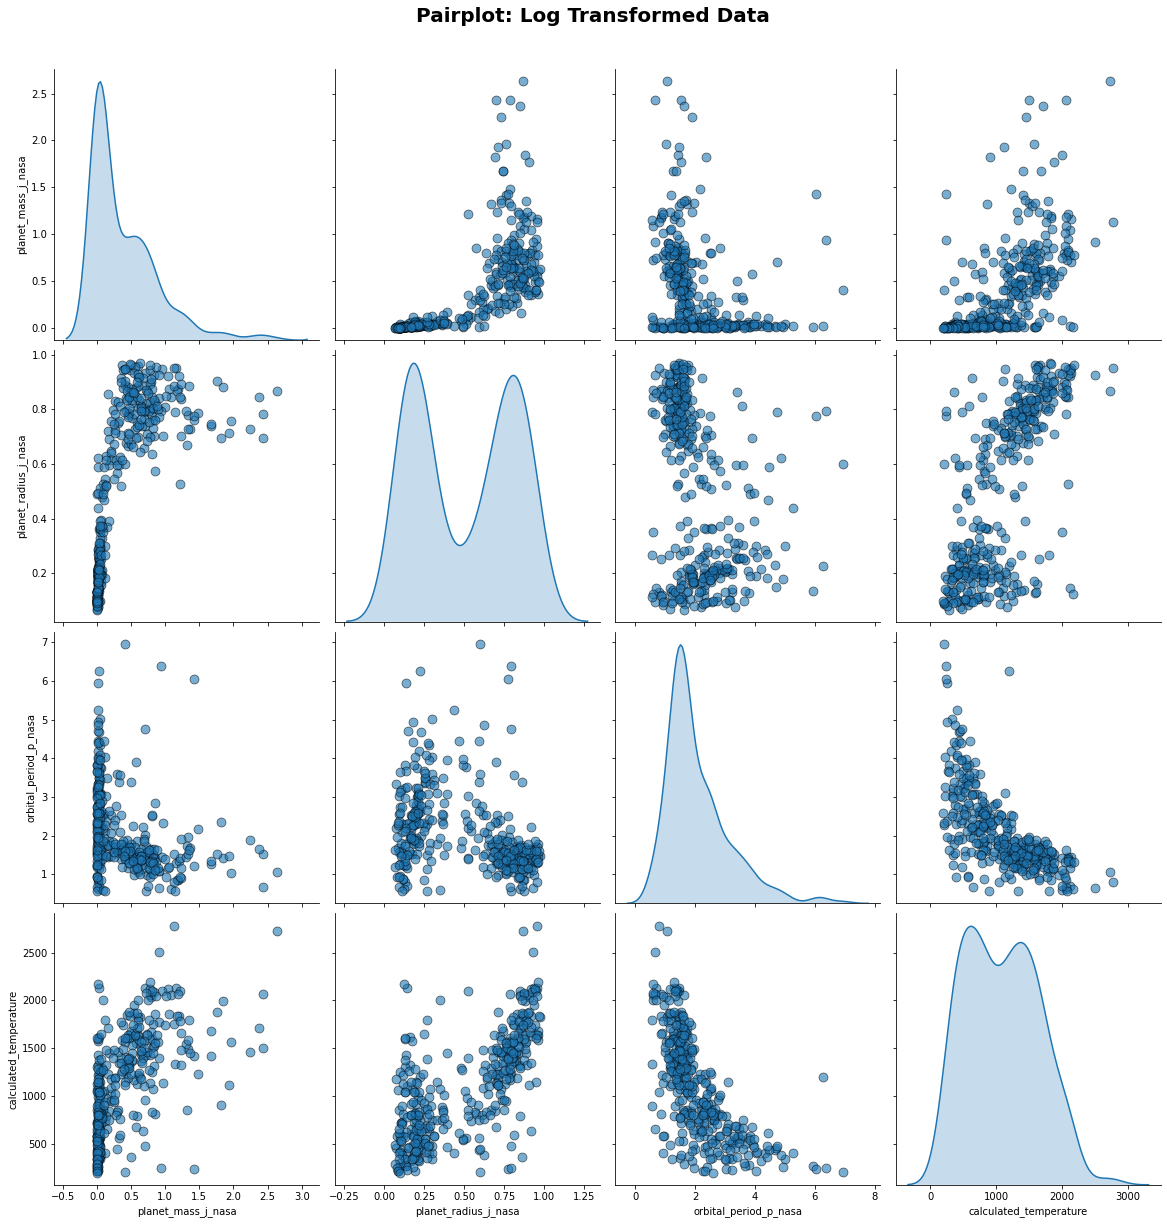

In [9]:
g = sns.pairplot(
    log_df,
    diag_kind = 'kde',
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    height = 4
)
g.fig.suptitle("Pairplot: Log Transformed Data", y=1.05, fontweight="bold", fontsize=20) # y= some height>1
g

## Using the Elbow Method to Determine the Ideal Numbers of Clusters for KMeans

In [10]:
# Elbow Method 
# https://predictivehacks.com/k-means-elbow-method-code-for-python/
distortions = []
K = range(1,10)
for k in K:
    model = sklearn.cluster.KMeans(n_clusters=k)
    model.fit(log_df)
    distortions.append(model.inertia_) # Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('The Elbow Method; Finding the Optimal Value of K')
plt.show()

## Cluster Model Instantiation and Fitting

In [11]:
# Heirarchical Clustering Models
heirarchical_clusterer = sklearn.cluster.AgglomerativeClustering(3)
# Running the Clustering Models
log_df["heirarchical_3"] = heirarchical_clusterer.fit(log_df).labels_

# KMeans Clustering
kmeans_clusterer = sklearn.cluster.KMeans(3)
log_df["k_means_3"] = kmeans_clusterer.fit(log_df).labels_
log_df

planet_mass_j_nasa  planet_radius_j_nasa  \
bd+20 594 b                0.067659              0.207014   
corot-22 b                 0.037296              0.361165   
corot-24 b                 0.017840              0.285179   
corot-24 c                 0.084341              0.364643   
corot-27 b                 2.432736              0.696641   
...                             ...                   ...   
wendelstein-1 b            0.464991              0.708528   
wolf 503 b                 0.014889              0.166362   
wts-2 b                    0.751416              0.859932   
xo-4 b                     0.883768              0.810930   
xo-7 b                     0.535908              0.864155   

                 orbital_period_p_nasa  calculated_temperature  \
bd+20 594 b                   3.753859                   386.0   
corot-22 b                    2.375462                   885.0   
corot-24 b                    1.810483                  1070.0   
corot-24 c                    2.546237                   850.0   
corot-27 b                    1.520677                  1500.0   
...                                ...                     ...   
wendelstein-1 b               1.298396                  1884.0   
wolf 503 b                    1.946079                   805.0   
wts-2 b                       0.702457                  2000.0   
xo-4 b                        1.634146                  1641.0   
xo-7 b                        1.351740                  1743.0   

                 heirarchical_3  k_means_3  
bd+20 594 b                   0          1  
corot-22 b                    0          1  
corot-24 b                    2          2  
corot-24 c                    0          1  
corot-27 b                    1          2  
...                         ...        ...  
wendelstein-1 b               1          0  
wolf 503 b                    0          1  
wts-2 b                       1          0  
xo-4 b                        1          0  
xo-7 b                        1          0  

[367 rows x 6 columns]

# Viewing the Cluster Classifications

In [12]:
g = sns.pairplot(
    log_df[columns + ["heirarchical_3"]], 
    hue = 'heirarchical_3',
    diag_kind = 'kde',
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    height = 4
)
g.fig.suptitle("Heirarchical Clustering Algorithm ; K = 3", y=1.05, fontweight="bold", fontsize=20) # y= some height>1
g

In [13]:
g = sns.pairplot(
    log_df[columns + ["k_means_3"]], hue = 'k_means_3',
    diag_kind = 'kde',
    plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
    height = 4,
)
g.fig.suptitle("K-Means Clustering Algorithm ; K = 3", y=1.05, fontweight="bold", fontsize=20) # y= some height>1
g